#  Programming for Data Analysis 
## Diarmuid Whelan Assignment 24-10-2018
This Jupyter notebook  will analyse the python numpy.random package across 4 areas, as follows:
 -  Explain the overall purpose of the package.
 -  Explain the use of the “Simple random data” and “Permutations” functions. 
 -  Explain the use and purpose of at least five “Distributions” functions.
 -  Explain the use of seeds in generating pseudorandom numbers.
 
## Purpose of Numpy Random Package
Numpy.Random is a package used to generate random numbers based on a number of flexible parameters such as distribution or seed. An important part of any model or simulation is the ability to generate random numbers. For this purpose, Numpy provides various options through the random package. Random enables users to genersate random numbers based on different distributions.


## Simple Random Data and Permutations Packages
### Simple Random Data
Numpy.random offers a number of methods to generate random data.  We can choose different functions to produce random data. The rand function produces random sample from a uniform distribution within given parameters. The randn function pulls a sample from normal distribution. Randint produces uniformly distributed integers.



In [1]:
import numpy as np
x=np.random.rand(10000)
import matplotlib.pyplot as plt
plt.hist(x)

rn = np.random.randn(10,2)# Get random values from normal distribution where shape is 10 rows and 2 columns
print(rn)

ri=np.random.randint(0,10)     # Get a random integer in the range between 0 and 10
print(ri)

y=np.random.choice([1,3,5,11,13,17,19,23,29]) # Get a random element from the sequence of prime numbers
print(y)



[[ 0.56300731  0.86692506]
 [-0.48556174  0.56066057]
 [ 0.39411522 -0.98373812]
 [-0.2462633   0.22312314]
 [ 0.32214898  0.24518447]
 [-1.00846338  0.97739168]
 [-0.05972951 -1.92564088]
 [-0.13290093  0.34115596]
 [ 0.64595569 -0.16342717]
 [ 0.36306769 -0.17754902]]
9
5


### Permutations
Permutations offers methods to randomly change the sequence, like shuffling a deck of cards. The shuffle function shuffles the elements of an array without changing them. Essentially modifying the sequence of the elements within an array. 

In [2]:
 np.random.shuffle(rn) ##Randomnly shuffle the elements in the array generated above
rn

array([[-0.2462633 ,  0.22312314],
       [ 0.36306769, -0.17754902],
       [ 0.32214898,  0.24518447],
       [-1.00846338,  0.97739168],
       [ 0.39411522, -0.98373812],
       [-0.13290093,  0.34115596],
       [-0.48556174,  0.56066057],
       [-0.05972951, -1.92564088],
       [ 0.56300731,  0.86692506],
       [ 0.64595569, -0.16342717]])

The permutation function permutes a sequence or range in a random way. If the parameter is an array the function returns a shuffled copy of the array.

In [11]:
# Permute the rn array.
np.random.permutation (rn)

array([[ 0.56300731,  0.86692506],
       [ 0.64595569, -0.16342717],
       [-1.00846338,  0.97739168],
       [ 0.32214898,  0.24518447],
       [-0.05972951, -1.92564088],
       [-0.13290093,  0.34115596],
       [ 0.39411522, -0.98373812],
       [ 0.36306769, -0.17754902],
       [-0.48556174,  0.56066057],
       [-0.2462633 ,  0.22312314]])


## Examining Distribution Functions
Distribuiton functions can be used to model many events in life. In sports the probability of certain events occurring can be simulated using a variety of distribution functions. Below I will give an overview of how different functions can be used in predicting outcomes.

### Normal (Gaussian) Distribution
The Normal or Gaussan distribution, after a German mathematician Carl Friedrich Gauss, is a well known distribution in statistics. It is used to describe a randomly ocurring variable and can be used to represent real-valued random variables whose distributions are not known. The normal distribution is useful because of the central limit theorem.  Averages of samples of observations of random variables independently drawn from independent distributions tend towards the normal distribution. The normal distribution is sometimes called the bell curve.

The beauty of a sporting event lies in the uncertainty of the outcome. Heavy underdogs can upset all projections and turn over the more favoured team. The number of points scored by a team in an NBA game can be modelled using a normal distribution. Taking the average number of points scored by a team to be 102 and the standard deviatioon of this to be 13, we can simulate the spread of expected total points scored by this team. We can calculate the probability that this team scores more than 120 points using the cumulative distribution function.
.

102.03585298495989
13.431696891864775
Probability of scoring 102 or less points is: 0.49893511186941053
Probability  of scoring 90 or less points is: 0.185105455646083
Probability  of scoring more than 120 points is: 0.09053881925368656


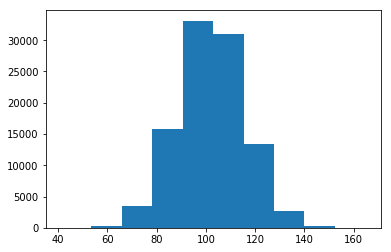

In [4]:
points=np.random.normal(loc=102, scale=13.4, size=100000)
print(np.mean(points))
print(np.std(points))
plt.hist(points)

from scipy import stats
norm = stats.distributions.norm


print('Probability of scoring 102 or less points is:',norm.cdf(x=102, loc=np.mean(points), scale= np.std(points)))
print('Probability  of scoring 90 or less points is:',norm.cdf(x=90,  loc=np.mean(points),  scale=np.std(points)))
print('Probability  of scoring more than 120 points is:',1-norm.cdf(x=120, loc= np.mean(points), scale=np.std(points)))




### Binomial Distribution
The binomial distribution can be likened to counting the number of successes in a sequence of n independent experiments. In sports like the NBA/MLB playoffs, if the probability of a team winning a game is p then the probability of them winning the best of n series can be explained by a binomial distribution, all things remaining equal. 
In the NBA playoffs opposing teams play a best of 7 series, meaning the first to win 4 games progresses to the next round. If the LA Lakers were facing Houston Rockets in the playoffs and we deemed the probability of LA Lakers winning a game as 60%, we can simulate the probability that they win 3/2/1 or less games. In addition we can extract the probability of them winning the 7 game series. 

4.2002
1.314047168103185
Probability of 3 or less wins is: 0.289792
Probability of 2 or less wins is: 0.09625599999999998
Probability of 1 or less wins is: 0.018841600000000007
Probability of winning the series is: 0.710208


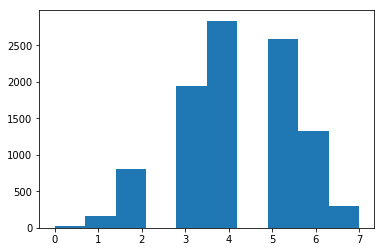

In [5]:
series  = np.random.binomial(7,0.6,10000)
print(np.mean(series))
print(np.std(series))
plt.hist(series)
from scipy import stats
binom = stats.distributions.binom


print('Probability of 3 or less wins is:',binom.cdf(k=3,  n=7,  p=0.6))
print('Probability of 2 or less wins is:',binom.cdf(k=2,  n=7,  p=0.6))
print('Probability of 1 or less wins is:',binom.cdf(k=1,  n=7,  p=0.6))
print('Probability of winning the series is:',1-binom.cdf(k=3,  n=7,  p=0.6))

### Poisson Distribution
The Poisson distribution is named after a French mathematician Siméon Denis Poisson. The Poisson distribution is a discrete probability distribution that generates the probability of a given number of events occurring in a fixed interval of time or space, if the events happen at a known constant rate and are independent of the time since the last event. In my industry, sports betting, the poisson distribution is often used to simulate the over/under lines for total goals/tries being scored. For instance when generating an estimation for total tries in rugby, each team will have an expected no. tries to score in the game (usually a long run average adjusted for opposition, conditions, venue etc.). From this we can use the Poisson distribution to calculate the probability of the teams scoring over/under 1.5/2.5/3.5/4.5 tries and so on. For example, if we take the Ireland  vs Italy rugby game in Soldier Field on Nov 3rd. Say Irelands expected number of tries for the game was 6.9 and Italy's was 2.8. This gives us a total expected tries of 9.7. We would asssume that the probability of over 9.7 tries being scored is the same as the probability of under 9.7 tries i.e. 50%. However, bookmakers want to generate a number of alternative lines for customers. In the below graph we simulate a match with expected tries of 9.7 and see the spread of the simulations under a poisson distribution. We can see the majority of results are clustered around 9.7 and between 5 and 15.  Using cumulative distribution function in the scipy stats package we can generate probabilities for different total tries lines.  
There were 9 tries in total scored. We can use the probability distribution function to calculate the probability of exactly 9 tries being scroed given an expectation of 9.7.


9.6888
3.1103945987607426
Probability of under 10.5 tries is: 0.6219102478527905
Probability of under 11.5 tries is: 0.7315635735565936
Probability of under 12.5 tries is: 0.8200976687298445
Probability of 9 tries scored is: 0.128491533103978


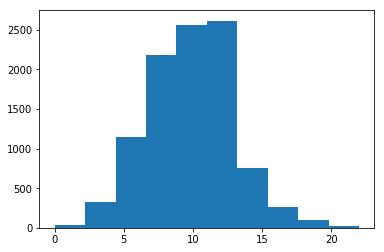

In [6]:
tries = np.random.poisson(9.7,10000)
print(np.mean(tries))
print(np.std(tries))
plt.hist(tries)
from scipy import stats
poisson = stats.distributions.poisson
print('Probability of under 10.5 tries is:',poisson.cdf(10.5, np.mean(tries)))
print('Probability of under 11.5 tries is:',poisson.cdf(11.5, np.mean(tries)))
print('Probability of under 12.5 tries is:',poisson.cdf(12.5, np.mean(tries)))

print('Probability of 9 tries scored is:',poisson.pmf(9, np.mean(tries)))

### Uniform Distribution
The uniform distribution is a distribution where all values between a minimum and maximum value are equally probable. This can be on a continuous or discrete scale. 

50.43291741397147
28.461604052066654


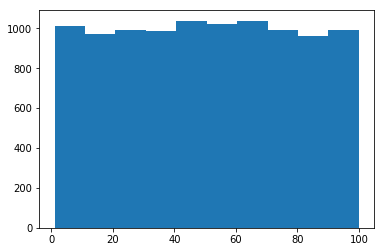

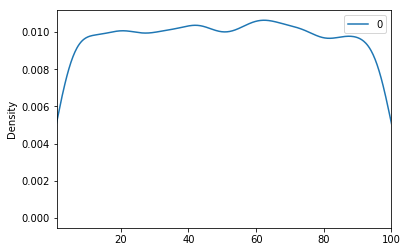

In [7]:
uniform =np.random.uniform(1,100,10000)
print(np.mean(uniform))
print(np.std(uniform))
plt.hist(uniform)

import pandas as pd

pd.DataFrame(uniform).plot(kind="density", xlim=(1,100))  # Plot the distribution



The probability of rolling each number on a fair dice can be represented by a discrete uniform distribution. Each of the numbers 1-6 are equally likely ~ 16% (1/6) 

3.501
1.7179636201037551
Probability of rolling a 1 is: 0.16666666666666666
Probability of rolling a 2 is: 0.16666666666666666
Probability of rolling a 3 is: 0.16666666666666669
Probability of rolling a 4 is: 0.16666666666666663
Probability of rolling a 5 is: 0.16666666666666674
Probability of rolling a 6 is: 0.16666666666666663


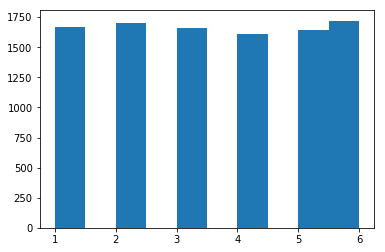

In [8]:


dice =np.random.randint(1,7,10000)
print(np.mean(dice))
print(np.std(dice))
plt.hist(dice)



from scipy import stats
uni = stats.uniform


print('Probability of rolling a 1 is:',uni.cdf(x=1,loc=0,     scale=6))
print('Probability of rolling a 2 is:',uni.cdf(x=2,loc=0,     scale=6)-uni.cdf(x=1,loc=0,     scale=6))
print('Probability of rolling a 3 is:',uni.cdf(x=3,loc=0,     scale=6)-uni.cdf(x=2,loc=0,     scale=6))
print('Probability of rolling a 4 is:',uni.cdf(x=4,loc=0,     scale=6)-uni.cdf(x=3,loc=0,     scale=6))
print('Probability of rolling a 5 is:',uni.cdf(x=5,loc=0,     scale=6)-uni.cdf(x=4,loc=0,     scale=6))
print('Probability of rolling a 6 is:',uni.cdf(x=6,loc=0,     scale=6)-uni.cdf(x=5,loc=0,     scale=6))

#### Exponential Distribution
The exponential distribution is the probability distribution that describes the time between events in a Poisson point process.It is often referred to as memoryless.Continuing with the sport theme, The time intervals between successive scoring events are believed to follow an exponential distribution, with essentially no memory between different scoring intervals. Taking the try expectation from the above poisson example of total tries in the Ireland vs Italy rugby game we can simulate the expected time to wait between tries. There was a 28 minute gap between the first and second tries of the match (Tadhg Beirne(5') - Luke McGrath(33')). We can check to see the probability of having to wait this long for a try (80 minute game).

0.1044522010485281
0.10306041542458362
Probability of waiting less than 20 minutes until next try is: 0.7564071406809459
Probability of waiting less than 40 minutes until next try is: 0.9784637706080074
Probability of waiting less than 60 minutes until next try is: 0.9980959656300227
Probability of waiting 28 minutes between tries is: 0.14884886733883


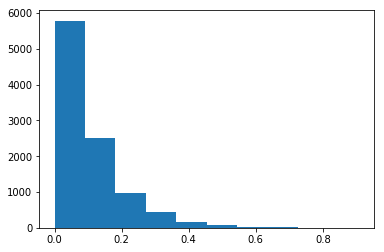

In [9]:
time = np.random.exponential(1/9.7,10000)
print(np.mean(time))
print(np.std(time))
plt.hist(time)

from scipy import stats
expon = stats.expon
print('Probability of waiting less than 20 minutes until next try is:',expon.cdf(0.25, np.mean(time),np.std(time)))
print('Probability of waiting less than 40 minutes until next try is:',expon.cdf(0.5, np.mean(time),np.std(time)))
print('Probability of waiting less than 60 minutes until next try is:',expon.cdf(0.75, np.mean(time),np.std(time)))
print('Probability of waiting 28 minutes between tries is:',expon.ppf(.35, np.mean(time),np.std(time)))



## Use of seeds in generating pseudorandom numbers
An often encountered issue with generating random numbers, like when using Numpy.random is the results are different each time a routine is executed. If you want someone else to be able to exacty replicate your reults the randomness may cause issues. A solution to this issue is to set the seed of the random number generator before executing your code. This will act to standardise the starting point of any routine/function. Due to setting the seed the routine would not be considered to be completely random so we describe the numbers generated as pseudorandom numbers. 




In [10]:
np.random.seed(12)  # Set the seed to an arbitrary value

print([np.random.uniform(0,10) for a in range(4)])

np.random.seed(12)  # Set the seed to the same value

print([np.random.uniform(0,10) for a in range(4)])


[1.5416284237967237, 7.400496965154048, 2.6331501518513467, 5.337393933802978]
[1.5416284237967237, 7.400496965154048, 2.6331501518513467, 5.337393933802978]



## References
https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html

https://en.wikipedia.org/wiki/Poisson_distribution

https://en.wikipedia.org/wiki/Exponential_distribution

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html

http://physics.bu.edu/~redner/pubs/pdf/bball-scoring.pdf

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.uniform.html#numpy.random.uniform

https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)

https://en.wikipedia.org/wiki/Binomial_distribution

https://en.wikipedia.org/wiki/Normal_distribution

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.normal.html#numpy.random.normal

